# Arps Decline Curve Analysis using `arpsdca` 

_Arps Equation_:
$$q(t) =  \frac{qi} {(1+b d_{i} t)^{1-b}}$$

## Predicting EUR using `predict_arps`

`prd_time_series`: (str) a production time series in form of a csv

`well_nm`: (str, int) the API, or well ID/ name 

`liquid`: (str) the type of liquid to calculuate EUR

`qi_min`: (int) qi lower bound 

`b_min`: (int) bi lower bound 

`di_min`: (int) di lower bound 

`qi_max`: (int) qi upper bound  

`b_max`: (int) bi upper bound 

`di_max`: (int) di upper bound 

`sigma_fit`: (int) significance level for fitted curve. ** for 95% CL, sigma = 2

`sigma_pred`: (int) significance level for predicted curve

`pred_interval`: (float) future number of days to predict 

In [40]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

[[Model]]
    Model(hyperbolic_equation)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 115
    # data points      = 2251
    # variables        = 3
    chi-square         = 912012.736
    reduced chi-square = 405.699616
    Akaike info crit   = 13521.6329
    Bayesian info crit = 13538.7903
[[Variables]]
    qi:  232.163605 +/- 3.77094830 (1.62%) (init = 1000)
    b:   0.67104681 +/- 0.03077087 (4.59%) (init = 3)
    di:  0.00565688 +/- 2.5849e-04 (4.57%) (init = 20)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, di)  =  0.873
    C(qi, di) =  0.829
    C(qi, b)  =  0.573
R-Square:  80.852%
EUR:  96094.16905584249


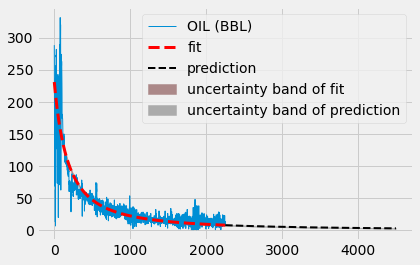

In [41]:
from arps.dca import *

ArpsCurve.predict_arps(
    prd_time_series='daily_production', 
    well_nm = '42493327380000',
    liquid='OIL (BBL)', 
    qi_min=220, 
    b_min=.3, 
    di_min=1e-5,
    qi_max=1000, 
    b_max=3, 
    di_max=20,
    sigma_fit=2,
    sigma_pred=2,
    pred_interval=4500
)

## Automate DCA on a production time series dataset using `fit_arps` for multiple time series

In [42]:
from arps.dca import *

Hyperbolic Fit Curve-fitted Variables:
r2=80.852% qi=232.1710493146503, b=0.671110616338872, di=0.005657497838908134


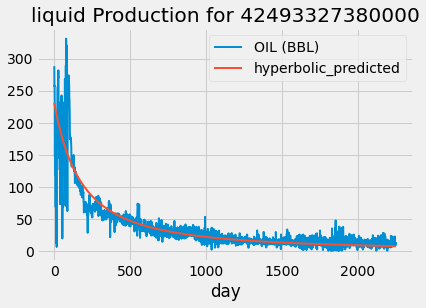

Hyperbolic Fit Curve-fitted Variables:
r2=92.538% qi=331.5532510700054, b=0.35744111255456434, di=0.004294962670926531


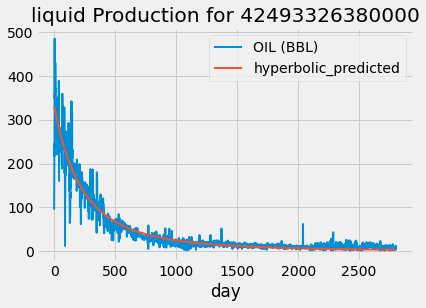

Hyperbolic Fit Curve-fitted Variables:
r2=90.536% qi=384.0920834476644, b=0.16572441807110466, di=0.0019651274342428584


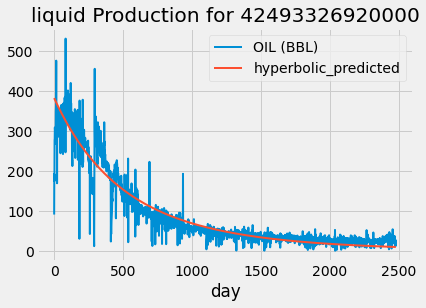

Hyperbolic Fit Curve-fitted Variables:
r2=87.648% qi=277.7865575334211, b=0.749018192876254, di=0.007009581541234841


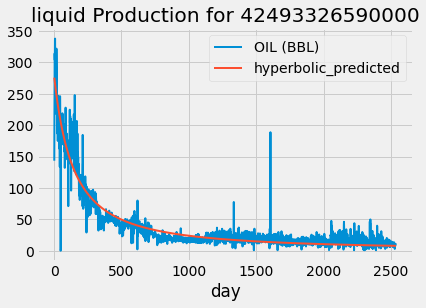

Hyperbolic Fit Curve-fitted Variables:
r2=84.193% qi=295.38610582576877, b=0.26435848988116667, di=0.0032296975169830286


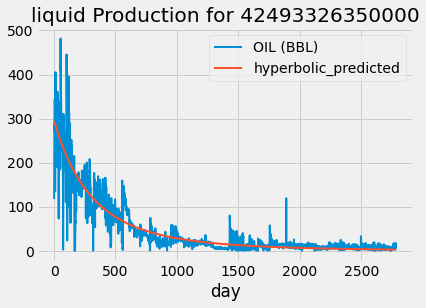

Hyperbolic Fit Curve-fitted Variables:
r2=82.483% qi=288.28396825028176, b=0.3958320089502543, di=0.0033620173054892018


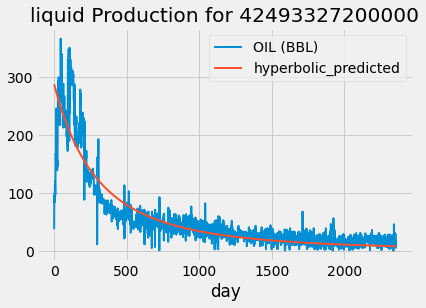

Hyperbolic Fit Curve-fitted Variables:
r2=70.094% qi=385.00285137218196, b=0.5426638543610446, di=0.0035965638514390296


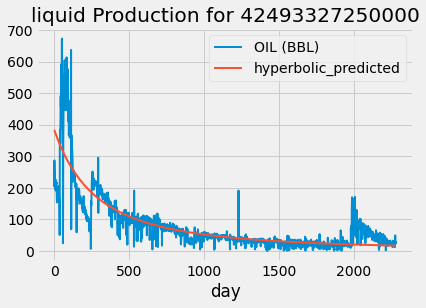

Hyperbolic Fit Curve-fitted Variables:
r2=82.337% qi=431.0345026802002, b=0.5443899544646748, di=0.006643645188119549


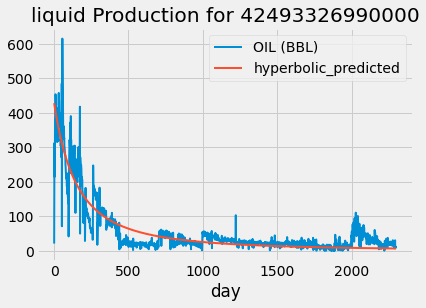

Hyperbolic Fit Curve-fitted Variables:
r2=78.407% qi=398.11934658685243, b=0.23220640391107683, di=0.003234162106339533


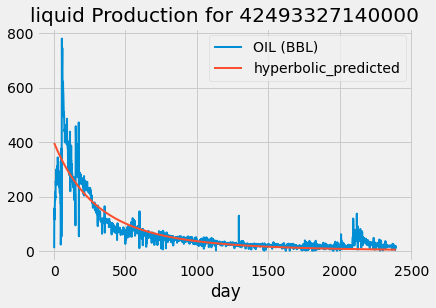

Hyperbolic Fit Curve-fitted Variables:
r2=68.765% qi=283.022686986865, b=0.2836284252644811, di=0.002406897525654186


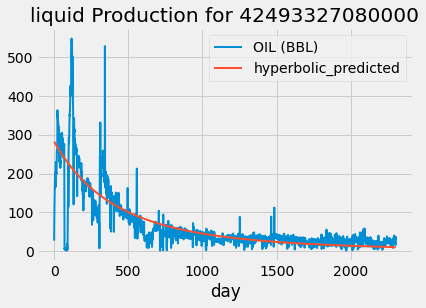

In [43]:
ArpsCurve.execute_arps(
    prod_data = pd.read_csv('daily_production.csv'),
    days = 100,
    liquid = 'OIL (BBL)',
    b_upper = 2.5,
    di_bound = 20
)